### Importación de datos



In [2]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1['tienda'] = 'tienda1'
tienda2['tienda'] = 'tienda2'
tienda3['tienda'] = 'tienda3'
tienda4['tienda'] = 'tienda4'

df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)


In [3]:
df.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,tienda1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,tienda1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,tienda1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,tienda1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,tienda1


#1. Análisis de facturación



In [4]:
resumen_tiendas = df.groupby('tienda').agg({
    'Precio': ['sum', 'mean', 'count', 'min', 'max']
}).reset_index()

resumen_tiendas.columns = ['tienda', 'total_ventas', 'promedio_ventas', 'cantidad_ventas', 'min_venta', 'max_venta']

resumen_tiendas['total_ventas'] = resumen_tiendas['total_ventas'].apply(lambda x: f"${x:,.0f}")
resumen_tiendas['promedio_ventas'] = resumen_tiendas['promedio_ventas'].apply(lambda x: f"${x:,.0f}")
resumen_tiendas['min_venta'] = resumen_tiendas['min_venta'].apply(lambda x: f"${x:,.0f}")
resumen_tiendas['max_venta'] = resumen_tiendas['max_venta'].apply(lambda x: f"${x:,.0f}")

In [5]:
resumen_tiendas

,tienda,total_ventas,promedio_ventas,cantidad_ventas,min_venta,max_venta
0,tienda1,"$1,150,880,400","$487,868",2359,"$7,600","$2,977,000"
1,tienda2,"$1,116,343,500","$473,227",2359,"$7,600","$2,953,400"
2,tienda3,"$1,098,019,600","$465,460",2359,"$7,600","$2,968,200"
3,tienda4,"$1,038,375,700","$440,363",2358,"$7,600","$2,902,200"


# 2. Ventas por categoría

In [6]:
conteo = df.groupby(['tienda', 'Categoría del Producto']).agg({'Precio': 'count'}).rename(columns={'Precio': 'recuento'}).sort_values(['tienda','recuento'], ascending=[True,False]).reset_index()

In [7]:
conteo

,tienda,Categoría del Producto,recuento
0,tienda1,Muebles,465
1,tienda1,Electrónicos,448
2,tienda1,Juguetes,324
3,tienda1,Electrodomésticos,312
4,tienda1,Deportes y diversión,284
5,tienda1,Instrumentos musicales,182
6,tienda1,Libros,173
7,tienda1,Artículos para el hogar,171
8,tienda2,Muebles,442
9,tienda2,Electrónicos,422


# 3. Calificación promedio de la tienda


In [8]:
prom_calificacion = df.groupby(['tienda']).agg({'Calificación': 'mean'})

In [9]:
prom_calificacion

,Calificación
tienda,
tienda1,3.976685
tienda2,4.037304
tienda3,4.048326
tienda4,3.995759


# 4. Productos más y menos vendidos

In [10]:
Conteo_productos = df.groupby(['tienda','Producto']).agg({'Producto': 'count'}).rename(columns={'Producto': 'Recuento'}).sort_values(['tienda','Recuento'], ascending=[True,False])

In [11]:
top_3 = (Conteo_productos.sort_values(['tienda','Recuento'], ascending=[True,False])
         .groupby('tienda')
         .head(3)
         .assign(Tipo='Más vendido'))
bottom_3 = (Conteo_productos.sort_values(['tienda','Recuento'], ascending=[True,True])
            .groupby('tienda')
            .head(3)
            .assign(Tipo='Menos vendido'))

combinado = pd.concat([top_3, bottom_3]).sort_values(['tienda','Recuento' ], ascending=[True,False])

combinado

Recuento           Tipo
tienda  Producto                                          
tienda1 Armario                          60    Más vendido
        Microondas                       60    Más vendido
        TV LED UHD 4K                    60    Más vendido
        Olla de presión                  35  Menos vendido
        Auriculares con micrófono        33  Menos vendido
        Celular ABXY                     33  Menos vendido
tienda2 Iniciando en programación        65    Más vendido
        Microondas                       62    Más vendido
        Batería                          61    Más vendido
        Impresora                        34  Menos vendido
        Mesa de comedor                  34  Menos vendido
        Juego de mesa                    32  Menos vendido
tienda3 Kit de bancas                    57    Más vendido
        Cama king                        56    Más vendido
        Mesa de comedor                  56    Más vendido
        Microondas                       36  Menos vendido
        Mochila                          36  Menos vendido
        Bloques de construcción          35  Menos vendido
tienda4 Cama box                         62    Más vendido
        Cubertería                       59    Más vendido
        Cama king                        56    Más vendido
        Guitarra acústica                37  Menos vendido
        Armario                          34  Menos vendido
        Guitarra eléctrica               33  Menos vendido

# 5. Envío promedio por tienda

In [12]:
prom_envio = df.groupby(['tienda']).agg({'Costo de envío': 'mean'}).rename(columns={'Costo de envío': 'Costo de envío promedio'})
prom_envio['Costo de envío promedio'] = prom_envio['Costo de envío promedio'].apply(lambda x: f"${x:,.0f}")

In [13]:
prom_envio

,Costo de envío promedio
tienda,
tienda1,"$26,019"
tienda2,"$25,216"
tienda3,"$24,806"
tienda4,"$23,459"


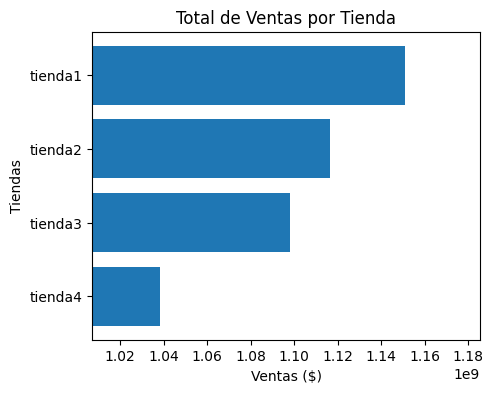

In [14]:
resumen_tiendas = df.groupby('tienda').agg({
    'Precio': ['sum', 'mean', 'count', 'min', 'max']
}).reset_index()

resumen_tiendas.columns = ['tienda', 'total_ventas', 'promedio_ventas', 'cantidad_ventas', 'min_venta', 'max_venta']
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
datos_ordenados = resumen_tiendas.sort_values('total_ventas', ascending=True)
plt.barh(datos_ordenados['tienda'], datos_ordenados['total_ventas'])
plt.title('Total de Ventas por Tienda')
min_ventas = datos_ordenados['total_ventas'].min()
max_ventas = datos_ordenados['total_ventas'].max()
plt.xlim(min_ventas * 0.97, max_ventas * 1.03)
plt.ylabel('Tiendas')
plt.xlabel('Ventas ($)')
plt.show()

<Figure size 600x300 with 0 Axes>

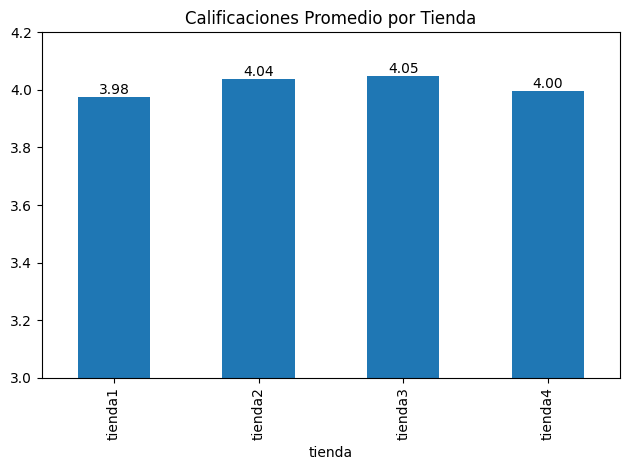

In [15]:
plt.figure(figsize=(6, 3))
prom_calificacion.plot(kind='bar', legend=False)
plt.title('Calificaciones Promedio por Tienda')
plt.ylim(3, 4.2)
for i, valor in enumerate(prom_calificacion['Calificación']):
    plt.text(i, valor, f'{valor:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

<Figure size 700x700 with 0 Axes>

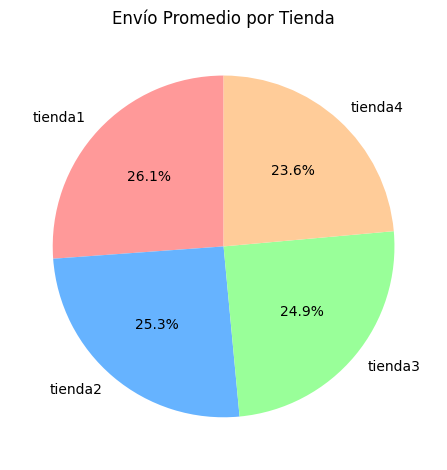

In [16]:
prom_envio = df.groupby(['tienda']).agg({'Costo de envío': 'mean'})
plt.figure(figsize=(7, 7))
prom_envio.plot(kind='pie',y='Costo de envío', autopct='%1.1f%%',legend=False, startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Envío Promedio por Tienda')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [17]:
df['fecha'] = pd.to_datetime(df['Fecha de Compra'], dayfirst=True)
df['año'] = df['fecha'].dt.year
tabla_ventas = df.groupby(['año', 'tienda'])['Precio'].sum().unstack()
tabla_ventas


tienda,tienda1,tienda2,tienda3,tienda4
año,,,,
2020,368933200.0,320466600.0,321707500.0,330847700.0
2021,362120800.0,351215500.0,362954400.0,347823600.0
2022,316565600.0,358226500.0,350438300.0,302221500.0
2023,103260800.0,86434900.0,62919400.0,57482900.0


<Figure size 1200x600 with 0 Axes>

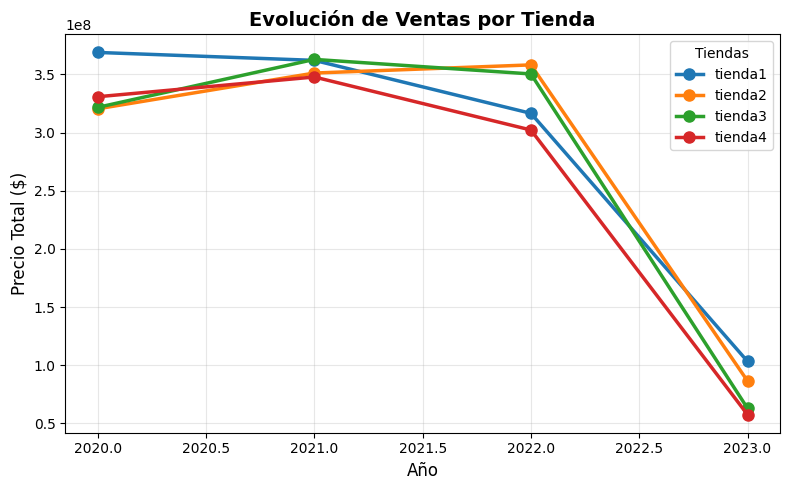

In [18]:
plt.figure(figsize=(12, 6))
tabla_ventas.plot(kind='line',
                  marker='o',
                  linewidth=2.5,
                  markersize=8,
                  figsize=(8, 5))

plt.title('Evolución de Ventas por Tienda', fontsize=14, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Precio Total ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Tiendas')
plt.tight_layout()
plt.show()

**Conclusiones.**
Buenas tardes, Sr. Juan. De acuerdo a los análisis realizados en las bases de datos se concluye que la tienda que debe ser vendida es la tienda 4.
Para respaldar la decisión se agregan, a continuación, las gráficas más importantes. Cabe señalar que la información sobre las categorías más vendidas, así como la de productos más vendidos no son agregadas ya que no se puede obtener información sobre su margen de ganancia (cosa que ayudaría bastante, pues solo se contemplan las ventas netas).
La primer gráfica es sobre el total de ventas por tienda, donde se muestra que la Tienda 1 es la que mayores ingresos netos obtiene.


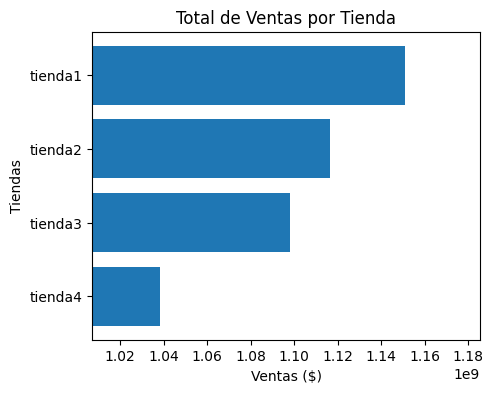

In [19]:
plt.figure(figsize=(5, 4))
datos_ordenados = resumen_tiendas.sort_values('total_ventas', ascending=True)
plt.barh(datos_ordenados['tienda'], datos_ordenados['total_ventas'])
plt.title('Total de Ventas por Tienda')
min_ventas = datos_ordenados['total_ventas'].min()
max_ventas = datos_ordenados['total_ventas'].max()
plt.xlim(min_ventas * 0.97, max_ventas * 1.03)
plt.ylabel('Tiendas')
plt.xlabel('Ventas ($)')
plt.show()

Continuando con el análisis, se agrega la gráfica del comportamiento de las ventas por tienda por año, en la cual se puede observar que el comportamiento de la tienda 4 ha sido menor respecto a las otras tiendas.

<Figure size 1200x600 with 0 Axes>

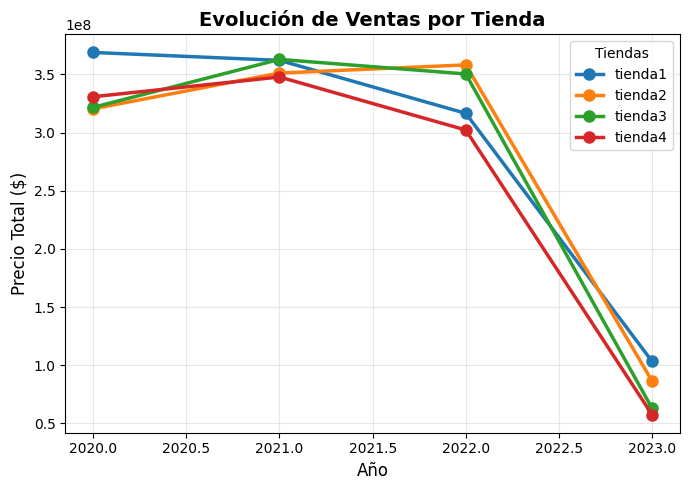

In [21]:
plt.figure(figsize=(12, 6))
tabla_ventas.plot(kind='line',
                  marker='o',
                  linewidth=2.5,
                  markersize=8,
                  figsize=(7, 5))

plt.title('Evolución de Ventas por Tienda', fontsize=14, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Precio Total ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Tiendas')
plt.tight_layout()
plt.show()

Para finalizar se agrega la gráfica de Calificación promedio por tienda, donde la tienda con menor evaluación es la 1, pero la variación entre la primera y la última es del 2% y la diferencia entre la última y la penúltima (la Tienda 1 y la Tienda 4 respectivamente) es del 0.5% por lo que estadísticamente es una diferencia despreciable.

<Figure size 600x300 with 0 Axes>

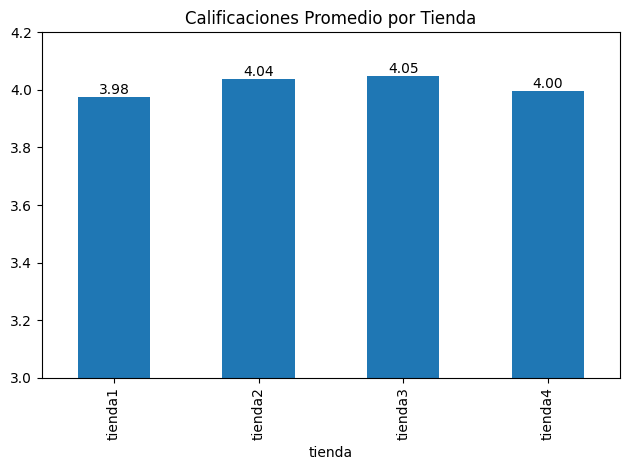

In [22]:
plt.figure(figsize=(6, 3))
prom_calificacion.plot(kind='bar', legend=False)
plt.title('Calificaciones Promedio por Tienda')
plt.ylim(3, 4.2)
for i, valor in enumerate(prom_calificacion['Calificación']):
    plt.text(i, valor, f'{valor:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [26]:
!pip install contextily

In [29]:
import contextily as ctx
import plotly.express as px

fig = px.scatter_mapbox(df,
                        lat="lat",
                        lon="lon",
                        hover_name="tienda",
                        color="tienda",
                        zoom=10,
                        size_max=15,
                        height=500)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()